In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

def print_metrics(y_true, y_pred):
    print(f'MSE:  {mean_squared_error(y_true, y_pred):.3f}')
    print(f'RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.3f}')
    print(f'MAE:  {mean_absolute_error(y_true, y_pred):.3f}')
    print(f'MAPE: {mean_absolute_percentage_error(y_true, y_pred):.3f}')
    print(f'R2:   {r2_score(y_true, y_pred):.3f}')


In [25]:
df = pd.read_csv('movie_dataset.csv')
df = df.dropna(subset=['runtime', 'genres', 'budget', 'revenue', 'director'])
df = df[(df['budget'] > 10000) & (df['revenue'] > 0) & (df['vote_count'] > 100) & (df['vote_average'] > 0)]
df = df.drop(columns=['index', 'id'])
df['profit'] = df['revenue'] - df['budget']
df['return_of_investment'] = df['profit'] / df['budget']
df['release_date'] = pd.to_datetime(df['release_date'])

df['budget_log'] = np.log1p(df['budget'])
df['revenue_log'] = np.log1p(df['revenue'])

zscores = (df['vote_average'] - df['vote_average'].mean()) / df['vote_average'].std()
outliers = (zscores > 3) | (zscores < -3)
df = df[~outliers]



df.shape

(2689, 26)

In [26]:

def gradient_descent(w0_now, w1_now, x_points_np, y_points_np, learning_rate):
    w0_gradient = 0
    w1_gradient = 0
    n = float(len(x_points_np))

    predictions = w0_now * x_points_np + w1_now
    errors = y_points_np - predictions

    w0_gradient = (-2.0/n) * np.sum(x_points_np * errors)
    w1_gradient = (-2.0/n) * np.sum(errors)

    w0_new = w0_now - (learning_rate * w0_gradient)
    w1_new = w1_now - (learning_rate * w1_gradient)

    return w0_new, w1_new

def linear_regression(xlabel,ylabel, x_scaled_np, y_original_np, scaler_x, learning_rate=0.01, epochs=10000):
    w0 = 0.0 
    w1 = 0.0 

    for i in range(epochs):
        w0, w1 = gradient_descent(w0, w1, x_scaled_np, y_original_np, learning_rate)

    w1_final = w0 / scaler_x.scale_[0]
    w0_final = w1 - (w1_final * scaler_x.mean_[0])

    print(f"Slope (w1): {w1_final:.4f}")
    print(f"Intercept (w0): {w0_final:.4f}")

    plt.figure(figsize=(10, 6))

    original_x = scaler_x.inverse_transform(x_scaled_np.reshape(-1, 1)).flatten()

    plt.figure(figsize=(8, 6))
    plt.scatter(original_x, y_original_np, color='blue', alpha=0.6)

    x_line = np.linspace(original_x.min(), original_x.max(), 200)
    y_line = w1_final * x_line + w0_final

    plt.plot(x_line, y_line, color='red', linewidth=2)
    plt.title("Linear Regression using Gradient Descent Impl")
    plt.grid(True)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

    return w1_final, w0_final

def calc_linear_regression(data_frame, col1, col2):
    X_original_np = data_frame[col1].values.reshape(-1, 1)
    y_original_np = data_frame[col2].values

    scaler_x = StandardScaler()
    X_scaled_np = scaler_x.fit_transform(X_original_np).flatten()

    linear_regression(
        col1,
        col2,
        X_scaled_np,
        y_original_np,
        scaler_x,
        learning_rate=0.01,
        epochs=10000
    )
    


In [27]:
from sklearn.linear_model import LinearRegression

def calc_linear_regresion_test(dataFrame, col1, col2):
    X = dataFrame[[col1]].values  
    y = dataFrame[col2].values  

    model = LinearRegression()
    model.fit(X, y)

    w1 = model.coef_[0]
    w0 = model.intercept_

    print(f"Slope (w1): {w1:.4f}")
    print(f"Intercept (w0): {w0:.4f}")

    x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_pred = model.predict(x_range)

    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, color='blue')
    plt.plot(x_range, y_pred, color='red', linewidth=2)
    plt.title(f'Linear Regression using sklearn')
    plt.grid(True)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()


Slope (w1): 0.7177
Intercept (w0): 5.7253


<Figure size 1000x600 with 0 Axes>

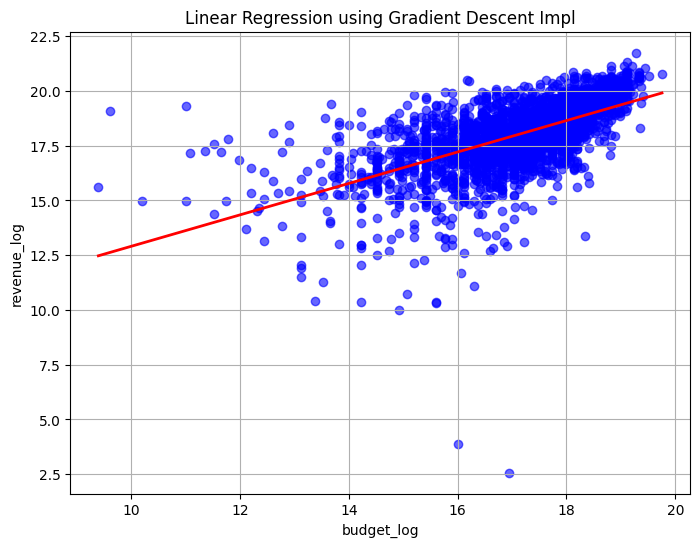

Slope (w1): 0.7177
Intercept (w0): 5.7253


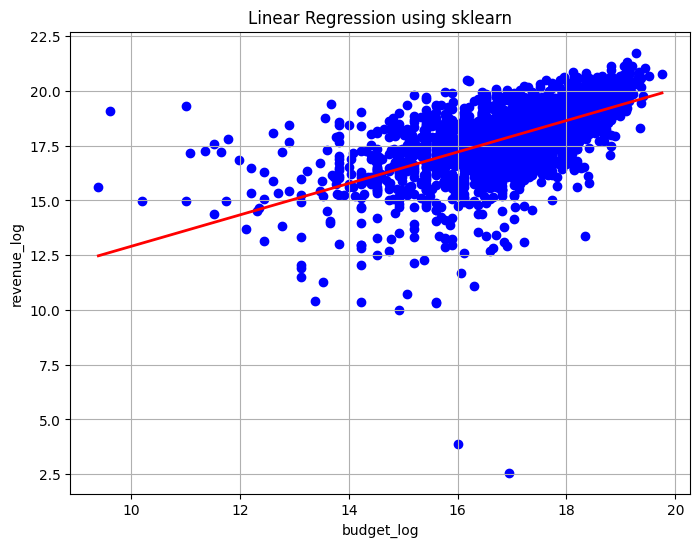

Slope (w1): 46316262.1044
Intercept (w0): -693151617.1397


<Figure size 1000x600 with 0 Axes>

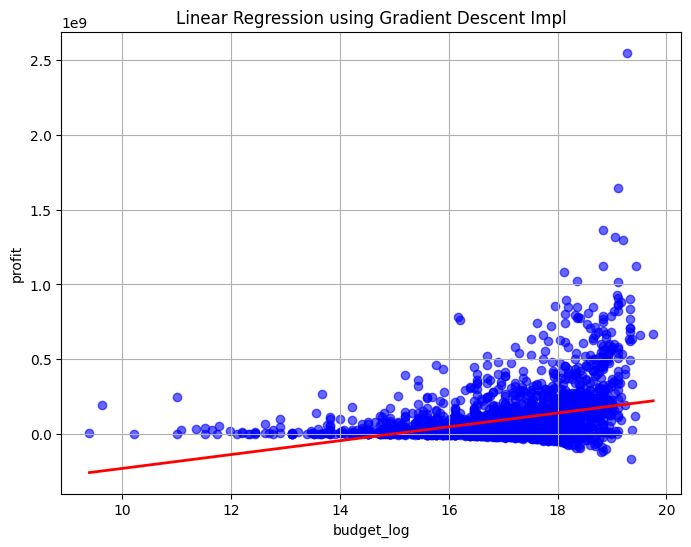

Slope (w1): 46316262.1044
Intercept (w0): -693151617.1397


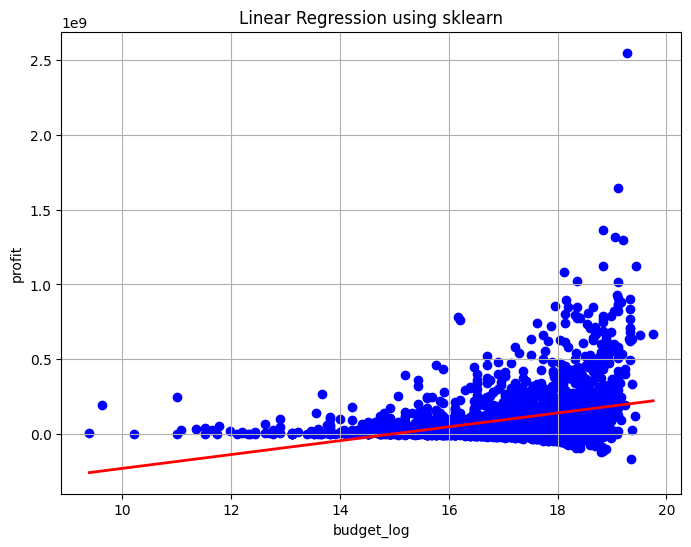

Slope (w1): 3.7841
Intercept (w0): 46.6821


<Figure size 1000x600 with 0 Axes>

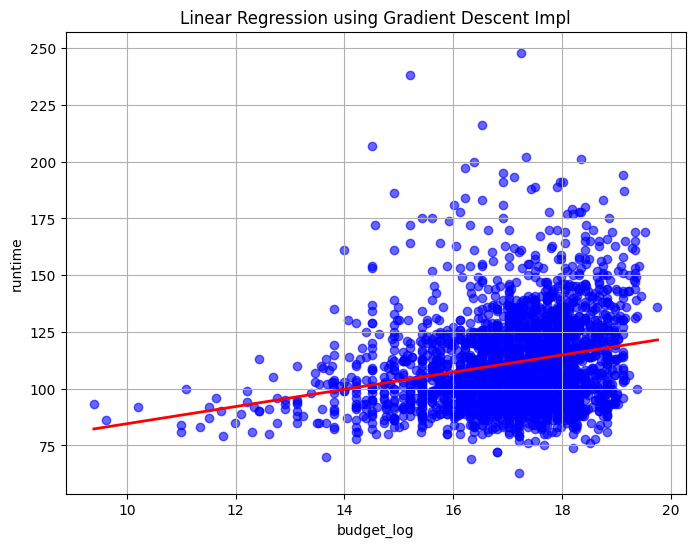

Slope (w1): 3.7841
Intercept (w0): 46.6821


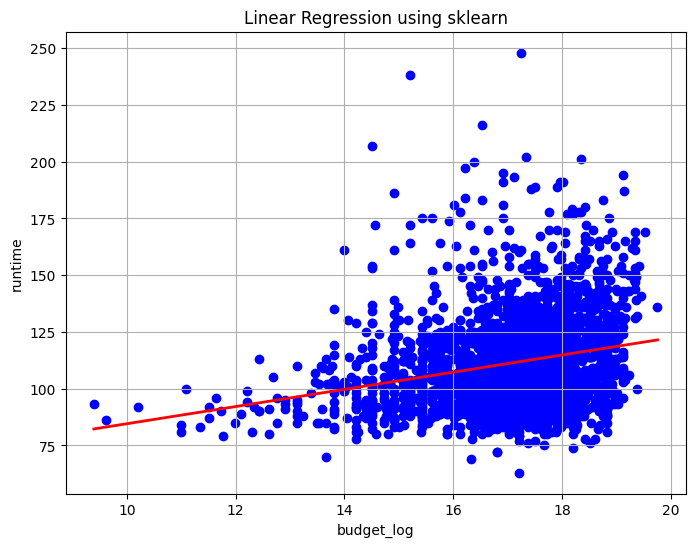

Slope (w1): -0.1136
Intercept (w0): 8.3264


<Figure size 1000x600 with 0 Axes>

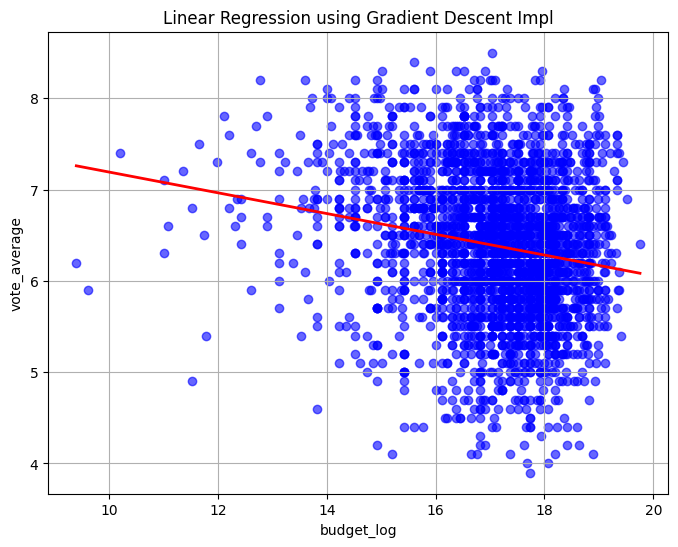

Slope (w1): -0.1136
Intercept (w0): 8.3264


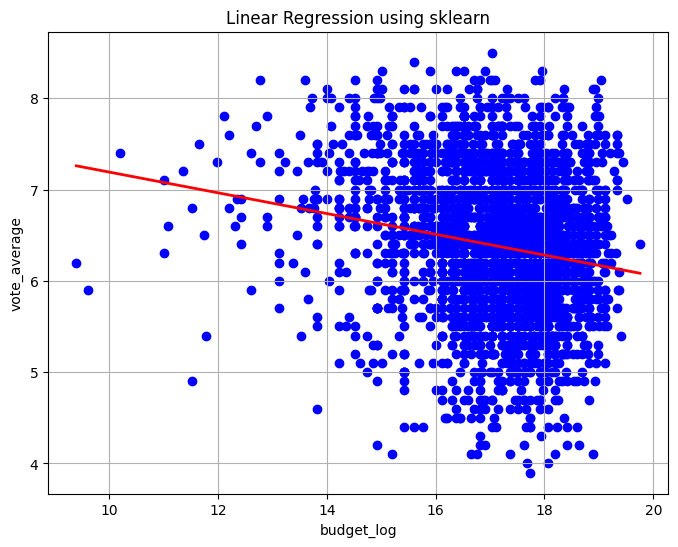

In [28]:

calc_linear_regression(df,'budget_log','revenue_log')
calc_linear_regresion_test(df,'budget_log','revenue_log')

calc_linear_regression(df,'budget_log','profit')
calc_linear_regresion_test(df,'budget_log','profit')

calc_linear_regression(df,'budget_log','runtime')
calc_linear_regresion_test(df,'budget_log','runtime')

calc_linear_regression(df,'budget_log','vote_average')
calc_linear_regresion_test(df,'budget_log','vote_average')

C:\Users\micku\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


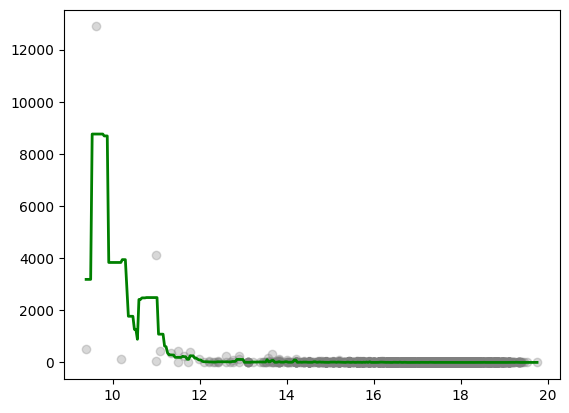

In [29]:
X = df[['budget_log']]
y = df['return_of_investment']
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model.fit(X_train, y_train)


budget_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
rf_preds = rf_model.predict(budget_range)

plt.scatter(X, y, alpha=0.3, label='Actual Data', color='gray')
plt.plot(budget_range, rf_preds, label='Random Forest', color='green', linewidth=2)




C:\Users\micku\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


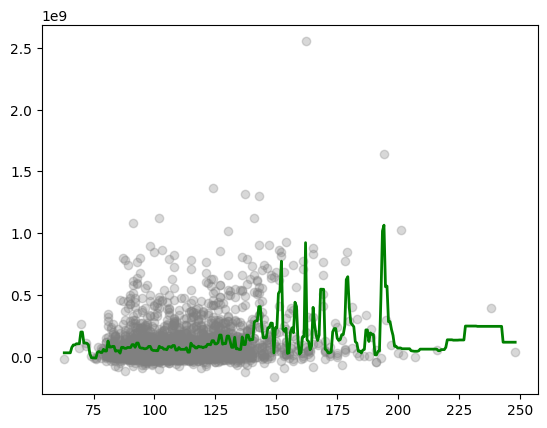

In [30]:
X = df[['runtime']]
y = df['profit']
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model.fit(X_train, y_train)


budget_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
rf_preds = rf_model.predict(budget_range)

plt.scatter(X, y, alpha=0.3, label='Actual Data', color='gray')
plt.plot(budget_range, rf_preds, label='Random Forest', color='green', linewidth=2)




C:\Users\micku\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


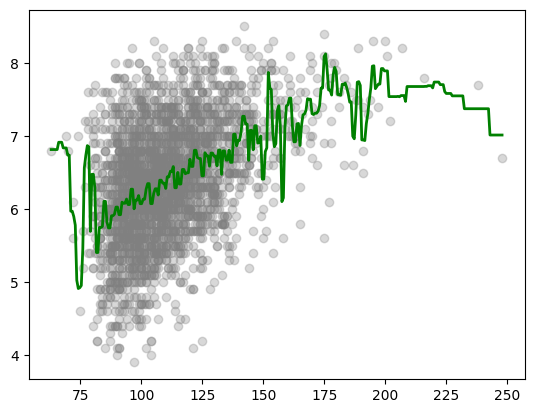

In [31]:
X = df[['runtime']]
y = df['vote_average']
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model.fit(X_train, y_train)


budget_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
rf_preds = rf_model.predict(budget_range)

plt.scatter(X, y, alpha=0.3, label='Actual Data', color='gray')
plt.plot(budget_range, rf_preds, label='Random Forest', color='green', linewidth=2)




C:\Users\micku\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\micku\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


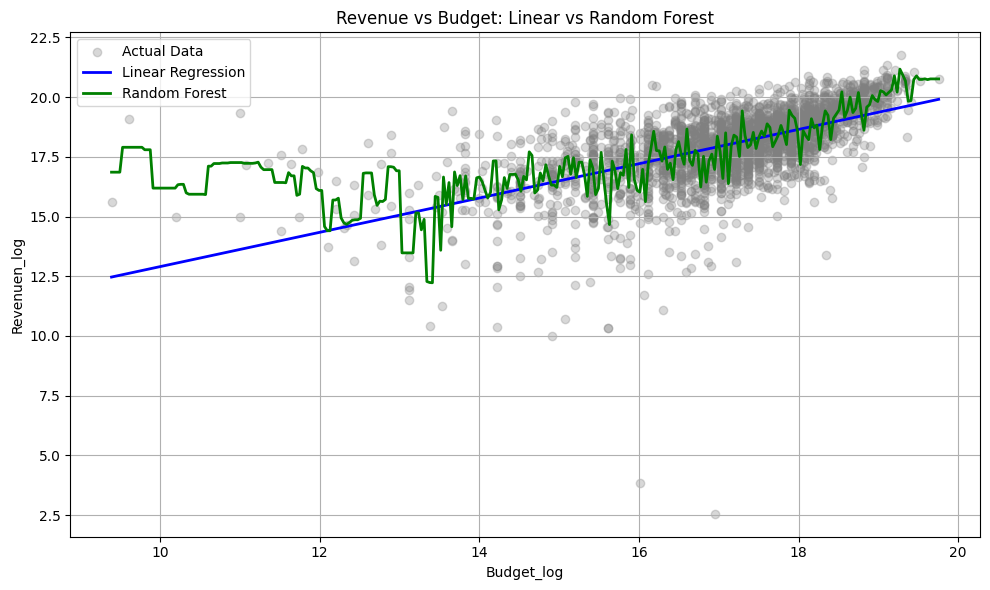

In [32]:


X = df[['budget_log']]
y = df['revenue_log']
lin_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

lin_model.fit(X, y)
rf_model.fit(X, y)

budget_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
lin_preds = lin_model.predict(budget_range)
rf_preds = rf_model.predict(budget_range)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.3, label='Actual Data', color='gray')
plt.plot(budget_range, lin_preds, label='Linear Regression', color='blue', linewidth=2)
plt.plot(budget_range, rf_preds, label='Random Forest', color='green', linewidth=2)
plt.xlabel('Budget_log')
plt.ylabel('Revenuen_log')
plt.title('Revenue vs Budget: Linear vs Random Forest')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Evaluation metrics
- MAE: mean absolute error
- MSE: mean squared error
- RMSE: root mean squared error
- MAPE: mean absolute percentage error
- R2: coefficient of determination

MSE:  15545612920575112.000
RMSE: 124682047.307
MAE:  79216067.029
MAPE: 11.153
R2:   0.413


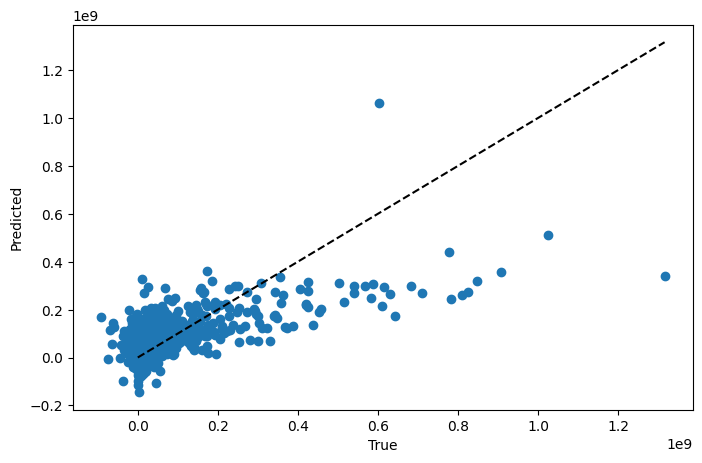

In [33]:
mlb = MultiLabelBinarizer()
genre_encoded = mlb.fit_transform(df['genres'])
genre_df = pd.DataFrame(genre_encoded, columns=mlb.classes_)
X = df[[ 'runtime', 'popularity', 'vote_average', 'budget_log']]
X = pd.concat([X.reset_index(drop=True), genre_df.reset_index(drop=True)], axis=1)
y= df['profit']

linear_model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)
print_metrics(y_test, y_pred)
plt.figure(figsize=(8, 5), dpi=100)
plt.scatter(y_test, y_pred)
plt.xlabel('True')
plt.ylabel('Predicted')
plt.plot([0, y_test.max()], [0, y_test.max()], color='black', linestyle='--')

ValueError: x and y must be the same size

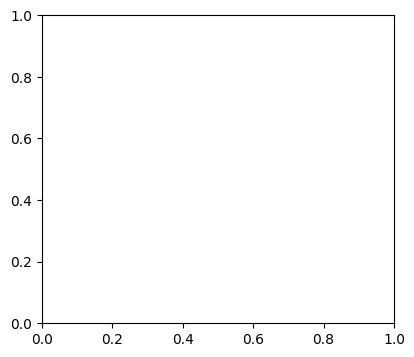

In [ ]:
y_res = y_test - y_pred

plt.figure(figsize=(10, 4), dpi=100)

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_res)
plt.xlabel('True values')
plt.ylabel('Residuals')

plt.subplot(1, 2, 2)
plt.hist(y_res, bins=50)
plt.xlabel('Residuals')

plt.show()
y_res

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(df[['budget']], df['revenue'], test_size=0.2, random_state=42)


models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'{name} Training error:')
    print_metrics(y_test, y_pred)
    print()

Linear Regression Training error:
MSE:  19952823875215400.000
RMSE: 141254464.974
MAE:  86191573.181
MAPE: 3.331
R2:   0.428

Random Forest Training error:
MSE:  22865452387143740.000
RMSE: 151213267.894
MAE:  89941758.976
MAPE: 5.315
R2:   0.345

